# likelihood 를 알아내는 방법에 따라 LDA, QDA, Nayive bayes..., etc. 로 나눔.
    선형회귀에서는 종속변수의 입실론의 분포만 따졌다면 
    여기서는 독립변수의 분포를 가정해서 계산하여 x 의 확률을 알아낸다.
    

# Quiz
1. 정상인 사람의 체온은 정규분포를 따른다.
2. µ = 37.5 , 𝞼 = 0.1

위의 데이터로 P(x|y=정상)의 수식이 파악됬다.
3. 여기로부터 어떤 x 값을 주어도 확률이 계산될수 있다.

In [6]:
# 정상인의 체온 정규분포 확률변수 생성
rv = sp.stats.norm(loc = 37.5, scale = 0.1)

In [5]:
# x = 37.8 일 확률계산
rv.pdf(37.8)

0.044318484119383855

<img scr ="resources/IMG_0141.jpg">

In [7]:
# covid19 걸린사람의 체온 정규분포 확률변수 생성
rv_covid = sp.stats.norm(loc = 40, scale = 0.1)

In [8]:
# x = 37.8 일 확률계산
rv_covid.pdf(37.8)

3.1742815528232774e-105

위의 퀴즈를 통해서 조건부확률의 가능도 계산방법을 알수 있다.
<img scr ="resources/IMG_0141.jpg">

# ⬇︎ 여기서부터 다변수 정규분포 복습

<img scr ="resources/mdn.png">

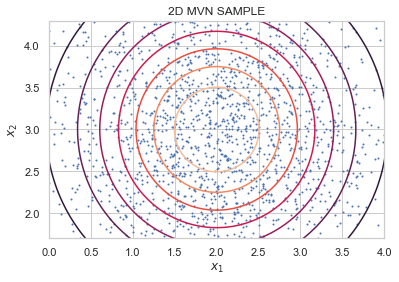

In [10]:
µ = [2, 3]
cov = [[1,0], [0,1]]

rv = sp.stats.multivariate_normal(µ, cov)
X = rv.rvs(2000)

xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:,0], X[:, 1], s = 1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX,YY])))
plt.axis('equal')
plt.xlim(0, 4)
plt.ylim(2, 4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("2D MVN SAMPLE")
plt.show()
%matplotlib inline


In [ ]:
# 공분산 행렬의 대각성분과 비대각 성분에 의한 공분산 

연습문제 8.6.2

풀수 있을때까지 선형대수 다시 복습

# ⬆︎ 여기까지 다변수 정규분포 복습

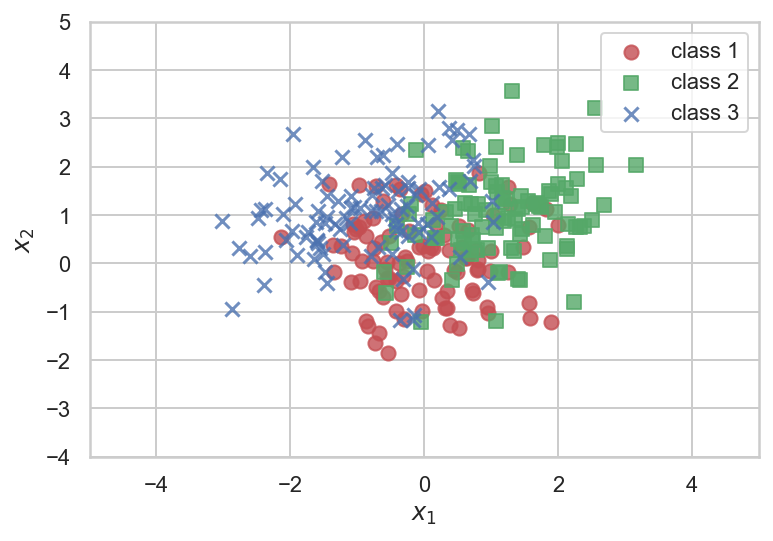

In [81]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

X의 평균값을 구해본다

In [16]:
X.mean(axis=0)

array([0.09939187, 0.7272404 ])

In [18]:
print(X1.mean(axis=0), X2.mean(axis=0), X3.mean(axis=0))

[-0.00080125  0.1194572 ] [1.16303727 1.03930605] [-0.8640604   1.02295794]


공분산 시그마를 구해본다

In [24]:
print(np.cov(X1.T),  np.cov(X2.T), np.cov(X3.T) , sep='\n')

[[ 0.73846319 -0.01762041]
 [-0.01762041  0.72961278]]
[[0.66534246 0.21132313]
 [0.21132313 0.78806006]]
[[0.9351386  0.22880955]
 [0.22880955 0.79142383]]


구해진 평균과 공분산을 비교해본다

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [27]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [31]:
print(qda.covariance_, sep='\n')

[array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]]), array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]]), array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])]


<font color = "yellow"> 여기까지 모수 평균과 공분산을 모두 알았다
여기서 다시 퀴즈 클래스 1이면서 (2, -1)일 확률 = 가능도

In [37]:
rv1 = sp.stats.multivariate_normal(X1.mean(axis=0), np.cov(X1.T))
rv2 = sp.stats.multivariate_normal(X2.mean(axis=0), np.cov(X2.T))
rv3 = sp.stats.multivariate_normal(X3.mean(axis=0), np.cov(X3.T))

a, b, c = rv1.pdf([2, -1]), rv2.pdf([2, -1]), rv3.pdf([2, -1])                                   

In [41]:
print("클래스 1 (빨간색) 이면서 (2, -1)일 확률 {}".format(a))
print("클래스 2 (녹색) 이면서 (2, -1)일 확률 {}".format(b))
print("클래스 3 (파란색) 이면서 (2, -1)일 확률 {}".format(c))

클래스 1 (빨간색) 이면서 (2, -1)일 확률 0.0065621236568562755
클래스 2 (녹색) 이면서 (2, -1)일 확률 0.0034060346804690644
클래스 3 (파란색) 이면서 (2, -1)일 확률 1.5412251295786176e-05


In [42]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

가능도와 사전확률을 모두 알았으니 최종 결과는 다음과 같다.

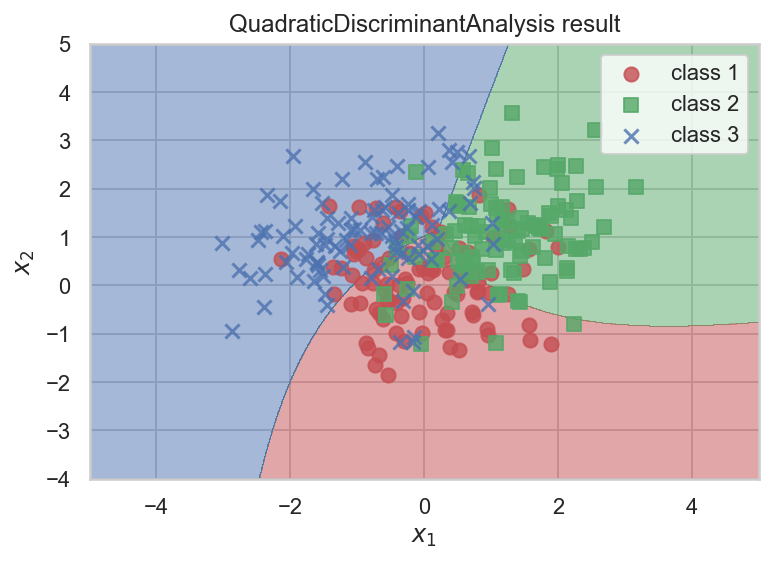

In [82]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("QuadraticDiscriminantAnalysis result")
plt.legend()
plt.show()

# 이차판별법 연습문제 1

이차판별분석법을 사용하여 붓꽃 분류문제를 풀고 성능을 분류결과표와 분류보고서를 출력하라. 그리고 각 클래스에 대한 ROC 커브를 그려라.

In [75]:
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
# y = label_binarize(iris.target, [0, 1, 2])


In [76]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis().fit(X,y)
y_pred = model.predict(X)

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



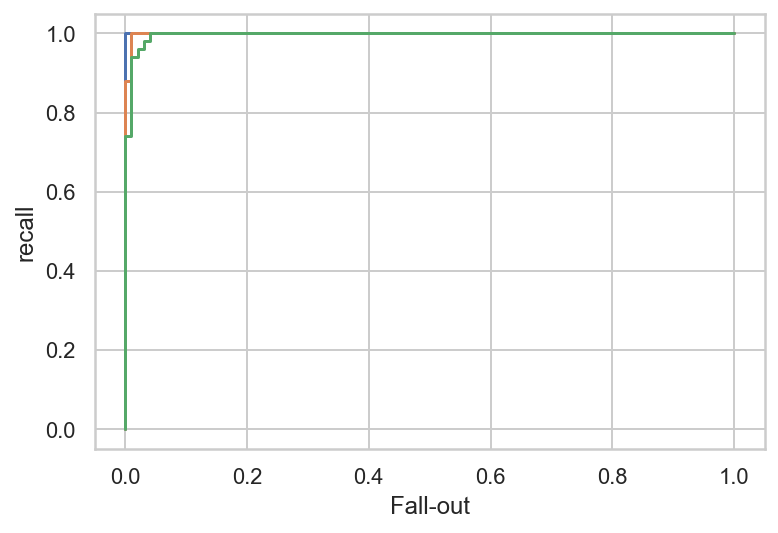

In [71]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
plt.xlabel('Fall-out')
plt.ylabel('recall')
plt.show()


### 선형판별분석법

∑를 클래스마다 구하는 수량과 작업을 일원화해서 분석하는 것.

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(X, y)

In [86]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [87]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

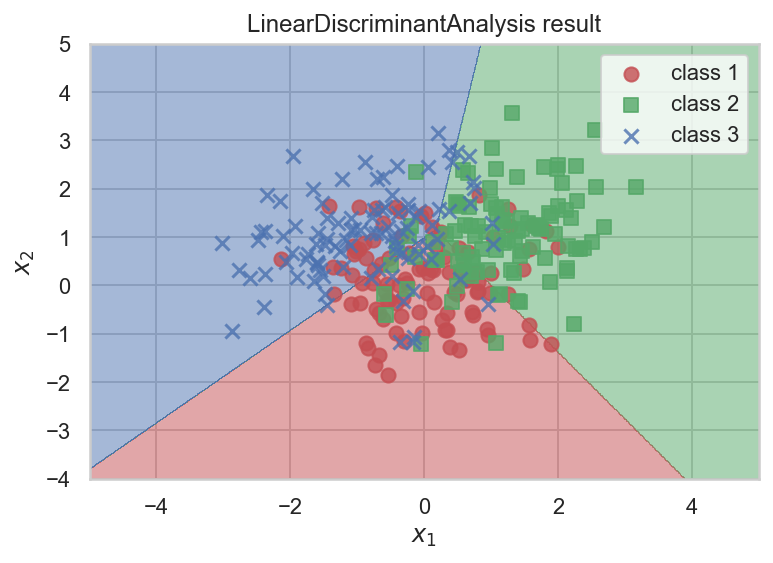

In [89]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("LinearDiscriminantAnalysis result")
plt.legend()
plt.show()

In [1]:
np.random.seed(0)
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

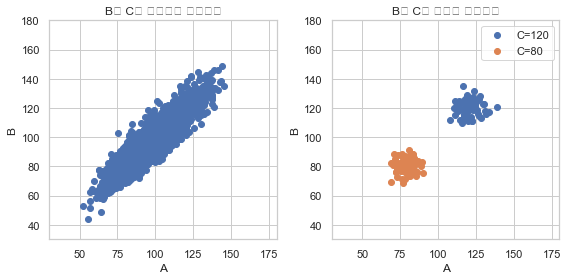

In [4]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(A, B)
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.title("B와 C의 무조건부 상관관계")

plt.subplot(122)
idx1 = (118 < C) & (C < 122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.legend()
plt.title("B와 C의 조건부 상관관계")

plt.tight_layout()
plt.show()
%matplotlib inline

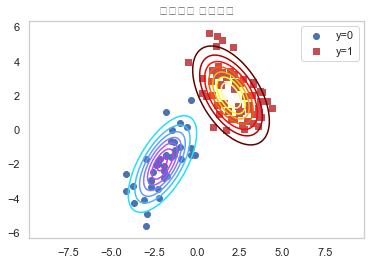

In [5]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.show()

In [6]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [7]:
model_norm.classes_

array([0., 1.])

In [8]:
model_norm.class_count_

array([40., 60.])

In [9]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [10]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

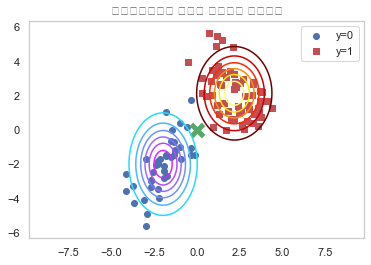

In [11]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")

x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c="g", marker="x", s=150, linewidth=5)
plt.legend()
plt.title("나이브베이즈로 추정한 데이터의 확률분포")
plt.axis("equal")
plt.show()

In [12]:
model_norm.predict_proba([x_new])

array([[0.48475244, 0.51524756]])

In [13]:
likelihood = [
    (sp.stats.norm(model_norm.theta_[0][0], np.sqrt(model_norm.sigma_[0][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[0][1], np.sqrt(model_norm.sigma_[0][1])).pdf(x_new[1])),
    (sp.stats.norm(model_norm.theta_[1][0], np.sqrt(model_norm.sigma_[1][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[1][1], np.sqrt(model_norm.sigma_[1][1])).pdf(x_new[1])),
]
likelihood

[0.006615760017637298, 0.00468796559514829]

In [14]:
posterior = likelihood * model_norm.class_prior_
posterior

array([0.0026463 , 0.00281278])

In [15]:
posterior / posterior.sum()

array([0.48475244, 0.51524756])

# 나이브베이즈 연습문제 

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data
y1 = iris.target
# columns = X.feature_names

In [37]:
from sklearn.naive_bayes import GaussianNB
model1_norm = GaussianNB().fit(X1,y1)

In [38]:
# 1. 사전확률
model1_norm.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [39]:
# 2. 각종의 feature 의 평균과 분산
model1_norm.theta_, model1_norm.sigma_

(array([[5.006, 3.428, 1.462, 0.246],
        [5.936, 2.77 , 4.26 , 1.326],
        [6.588, 2.974, 5.552, 2.026]]),
 array([[0.121764, 0.140816, 0.029556, 0.010884],
        [0.261104, 0.0965  , 0.2164  , 0.038324],
        [0.396256, 0.101924, 0.298496, 0.073924]]))

In [45]:
y1_pred = model1_norm.predict(X1)

from sklearn.metrics import confusion_matrix

confusion_matrix(y1, y1_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [44]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y1, y1_pred, target_names = target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       0.94      0.94      0.94        50
     class 2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



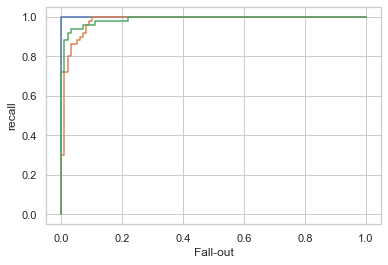

In [50]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

y1 = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X1, y1[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y1[:, i], model.predict_proba(X1)[:, 1])
    plt.plot(fpr[i], tpr[i])
plt.xlabel('Fall-out')
plt.ylabel('recall')
plt.show()
%matplotlib inline

### 베르누이분포 나이브베이즈 모형

In [16]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [67]:
3/6 * 1/6 * 2/6 * 4/6 * 4/10

0.007407407407407407

In [66]:
3/8 * 4/8 * 2/8*4/8*6/10

0.0140625

### 베르누이분포 나이브베이즈 모형

# 연습문제 2
    1. MNIST

In [114]:
from sklearn.datasets import load_digits
digits = load_digits()

In [115]:
X = digits.data
y = digits.target

In [116]:
X.shape

(1797, 64)

In [117]:
X[0, :]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [118]:
digits.images[0, :, :]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [119]:
from sklearn.preprocessing import Binarizer
X = Binarizer(7).fit_transform(X)

In [120]:
X[0, :]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

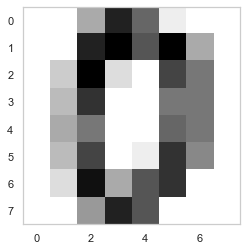

In [121]:
plt.imshow(digits.images[0, :, :], cmap=plt.cm.binary)
plt.grid()

In [122]:
# plt.imshow(Binarizer(7).fit_transform(digits.images[0, :, :], cmap=plt.cm.binary)


In [124]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X, y)
y_pred = model.predict(X)

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [129]:
theta = np.exp(model.feature_log_prob_)
theta

array([[0.00555556, 0.00555556, 0.15      , 0.97777778, 0.86111111,
        0.11666667, 0.00555556, 0.00555556, 0.00555556, 0.01666667,
        0.90555556, 0.93333333, 0.82222222, 0.83888889, 0.02777778,
        0.00555556, 0.00555556, 0.1       , 0.97222222, 0.32777778,
        0.08888889, 0.92222222, 0.11111111, 0.00555556, 0.00555556,
        0.23333333, 0.93333333, 0.09444444, 0.00555556, 0.67222222,
        0.43888889, 0.00555556, 0.00555556, 0.31111111, 0.91111111,
        0.03333333, 0.00555556, 0.61666667, 0.61666667, 0.00555556,
        0.00555556, 0.05555556, 0.97222222, 0.07777778, 0.06111111,
        0.84444444, 0.36111111, 0.00555556, 0.00555556, 0.00555556,
        0.94444444, 0.71666667, 0.72777778, 0.92222222, 0.09444444,
        0.00555556, 0.00555556, 0.00555556, 0.13333333, 0.98888889,
        0.94444444, 0.3       , 0.00555556, 0.00555556],
       [0.00543478, 0.00543478, 0.10326087, 0.6576087 , 0.76630435,
        0.42391304, 0.02173913, 0.00543478, 0.00543478, 0.0

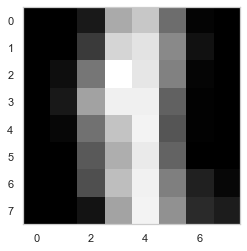

In [136]:
kk = np.reshape(theta[1], (8,8))

plt.imshow(kk, cmap="gray")
plt.grid()
plt.show()

### 베르누이분포 나이브베이즈 모형

In [17]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [18]:
model_bern.classes_

array([0, 1])

In [19]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('model', MultinomialNB()),
])
model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', MultinomialNB()),
])
model3 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('model', MultinomialNB()),
])
model4 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english",
                             token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
    ('model', MultinomialNB()),
])

In [ ]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f}").format(i + 1, np.mean(scores)))

Model1: Mean score: 0.855
Model2: Mean score: 0.856
